# Exemplo de Otimização da Simulação de Colisão

In [1]:
from random import randint, choice
import time
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import math
import random
from pf import Particle
from nav_msgs.msg import OccupancyGrid
from occupancy_field import OccupancyField
from helper_functions import angle_normalize, angle_diff

import cv2

import sys
import os
os.getcwd() 
import sys
sys.path.append(os.getcwd())

import rayline
reload(rayline)



import inspercles
reload(inspercles)


# Para suprimir alguns warnings do Matplotlib Inline
import warnings
warnings.simplefilter('ignore')
%matplotlib inline


## Diretório de trabalho

In [2]:
!pwd




/home/borg/catkin_ws/src/robot17/particle_filter/jupyter_particle


In [3]:
# Dados do arquivo mapa.yaml

resolution = 0.020000
origin =  [-5.000000, -5.000000, 0.000000]
occupied_thresh = 0.8
free_thresh =  0.2

inspercles.free_thresh = free_thresh # Limiar em tons de cinza para que uma celula seja considerada livre
inspercles.occupied_thresh = occupied_thresh # Limiar de celula ocupada
inspercles.origin = origin
inspercles.resolution = resolution


In [4]:


from PIL import Image as PilImage


color_image = cv2.imread("sparse_obstacles.png")
pil_image = color_image
np_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)


#color_image = PilImage.open("sparse_obstacles.png", 'r')
#pil_image = color_image.convert('1') # Converte a imagem PIL para Grayscale
#np_image = np.asarray(pil_image)

particle_size = 10

#import matplotlib_render as plotmap


back_color = "black"
colors     = ['red', 'green', 'cyan', 'yellow']
width, height = 775, 746

inspercles.width = width
inspercles.height = height




initial_pose = [200, 200, math.pi/8] # Posicao inicial considerada para o pf
inspercles.initial_pose = initial_pose
pose = [330, 220, math.radians(90)] # posicao "verdadeira" do robo 
inspercles.pose = pose
robot_radius=10   # Raio do robo
inspercles.robot_radius = robot_radius


# Os angulos em que o robo simulado vai ter sensores
angles = np.linspace(0.0, 2*math.pi, num=8)

particle_cloud = []



    
    
    
    

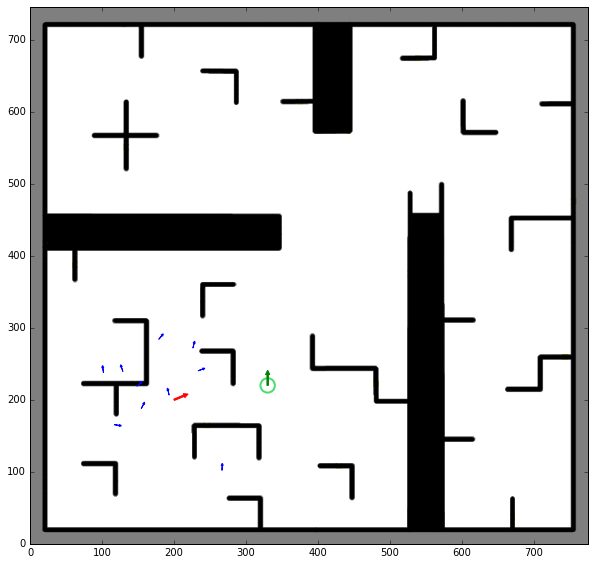

In [5]:

particulas = inspercles.nb_create_particles(pose = initial_pose, var_x = 100, var_y = 100, var_theta = math.pi/2, num = 10)
inspercles.nb_draw_map(color_image, particles = particulas, initial_position = initial_pose, pose=pose, robot=True)

# Conversão para imagem binárias




In [6]:
canny = cv2.Canny(np_image, occupied_thresh*255, free_thresh*255)

kernel = np.ones((3,3), np.uint8)
canny = cv2.dilate(canny, kernel, iterations=1)

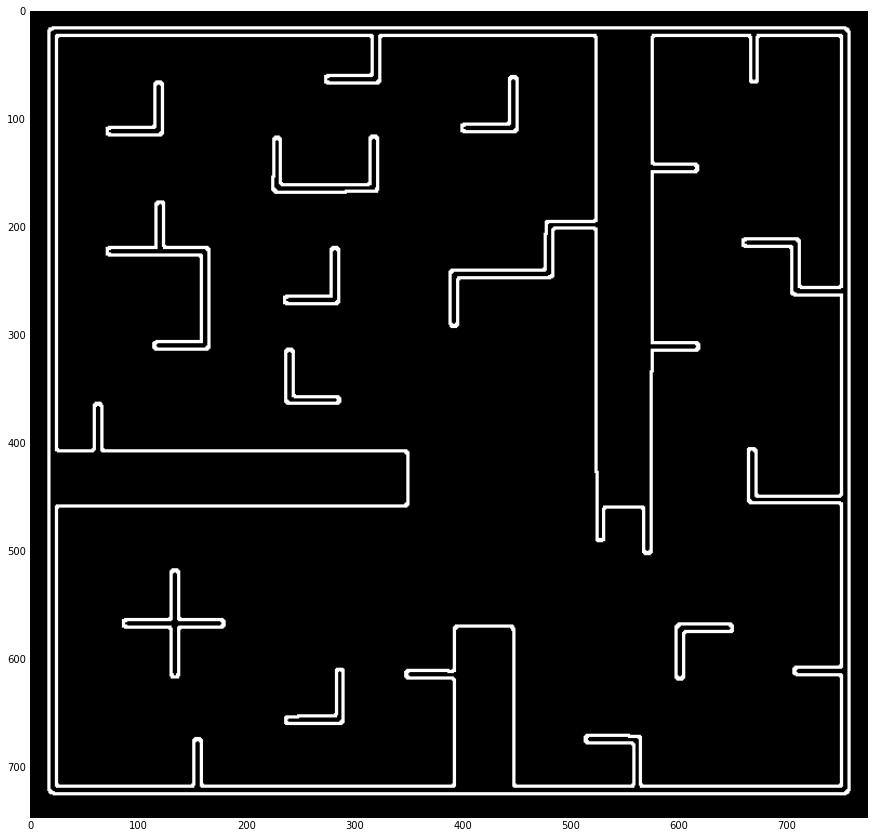

In [7]:
plt.figure(figsize=(15,15))
plt.imshow(canny, cmap="Greys_r", vmin=0, vmax=255)

Aplicaremos a transformada de Hough para retas



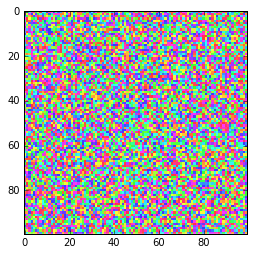

In [8]:
def test_colors():
    hsv_img = np.zeros([100,100,3], dtype=np.dtype('u1')) # We create a one-pixel image in HSV
    for i in range(hsv_img.shape[0]):
        for j in range(hsv_img.shape[1]):
            h = np.random.randint(low=0,high=180) # It's easier to randomize colors in the H component
            s = 200
            v = 255
            hsv_img[i][j] = [h,s,v]
            
    rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
    plt.imshow(rgb_img, interpolation="none")
test_colors()

775
(746, 775)
('Found ', 276, ' lines')


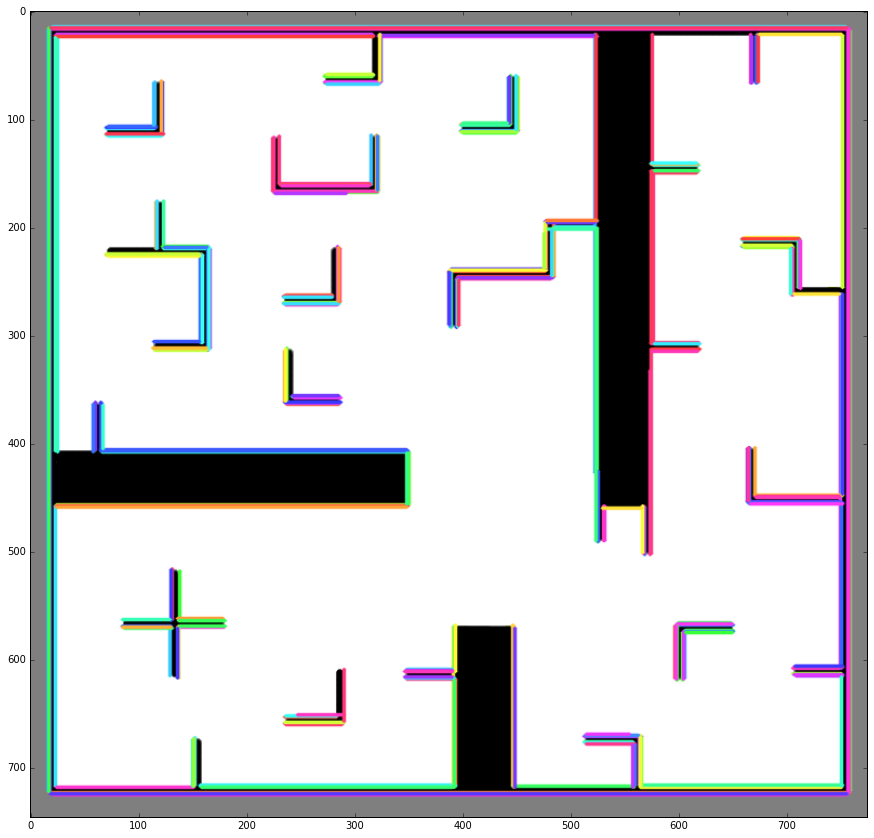

In [9]:


def random_color():
    h = np.random.randint(low=0,high=180) # It's easier to randomize colors in the H component
    s = 200
    v = 255
    hsv_img = np.array([[[h,s,v]]], dtype=np.dtype('u1')) # We create a one-pixel image in HSV
    #print(hsv_img)
    rgb_img = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
    color_val = rgb_img[0][0].astype(float)
    #color_val/=255
    #print(color_val)
    return color_val

    




    
    
edges = canny

img = np_image

canvas = np.copy(color_image)


print img.shape[1]
print img.shape
minLineLength=img.shape[1]/45

linhas = np.array([])

lines = cv2.HoughLinesP(image=edges,rho=0.02,theta=np.pi/500, threshold=25,lines=linhas, minLineLength=minLineLength,maxLineGap=3)

a,b,c = lines.shape
print("Found ", a," lines")
for i in range(a):
    cv2.line(canvas, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), random_color(), 2, cv2.LINE_AA)

plt.figure(figsize=(15,15))
plt.imshow(canvas)



In [10]:
lines

array([[[446, 717, 558, 717]],

       [[ 17, 723, 757, 723]],

       [[ 20,  15, 754,  15]],

       ..., 
       [[230, 159, 230, 116]],

       [[529, 460, 565, 460]],

       [[485, 201, 521, 201]]], dtype=int32)

In [11]:
for i in range(lines.shape[0]):
    print("x1 {} y1 {} x2 {} y2 {}".format(lines[i][0][0], lines[i][0][1], lines[i][0][2], lines[i][0][3]))

x1 446 y1 717 x2 558 y2 717
x1 17 y1 723 x2 757 y2 723
x1 20 y1 15 x2 754 y2 15
x1 17 y1 17 x2 757 y2 17
x1 23 y1 23 x2 317 y2 23
x1 23 y1 717 x2 23 y2 458
x1 18 y1 724 x2 18 y2 16
x1 322 y1 24 x2 524 y2 24
x1 749 y1 608 x2 749 y2 262
x1 21 y1 725 x2 754 y2 725
x1 16 y1 721 x2 16 y2 18
x1 17 y1 722 x2 17 y2 16
x1 756 y1 724 x2 756 y2 16
x1 758 y1 721 x2 758 y2 19
x1 750 y1 608 x2 750 y2 455
x1 751 y1 256 x2 751 y2 23
x1 19 y1 724 x2 755 y2 724
x1 19 y1 16 x2 755 y2 16
x1 157 y1 716 x2 393 y2 716
x1 757 y1 722 x2 757 y2 18
x1 24 y1 718 x2 151 y2 718
x1 24 y1 22 x2 316 y2 22
x1 25 y1 408 x2 25 y2 24
x1 575 y1 308 x2 575 y2 148
x1 24 y1 407 x2 24 y2 24
x1 574 y1 502 x2 574 y2 313
x1 576 y1 308 x2 576 y2 148
x1 524 y1 491 x2 524 y2 201
x1 65 y1 406 x2 348 y2 406
x1 522 y1 427 x2 522 y2 22
x1 523 y1 195 x2 523 y2 22
x1 66 y1 408 x2 350 y2 408
x1 24 y1 457 x2 350 y2 457
x1 24 y1 458 x2 349 y2 458
x1 24 y1 459 x2 348 y2 459
x1 65 y1 407 x2 349 y2 407
x1 391 y1 718 x2 391 y2 570
x1 573 y1 503 

In [12]:
lines_clone = np.copy(lines)

In [13]:
lines_clone

array([[[446, 717, 558, 717]],

       [[ 17, 723, 757, 723]],

       [[ 20,  15, 754,  15]],

       ..., 
       [[230, 159, 230, 116]],

       [[529, 460, 565, 460]],

       [[485, 201, 521, 201]]], dtype=int32)

In [14]:
x1 = lines_clone[:,0,0]
x1

array([446,  17,  20,  17,  23,  23,  18, 322, 749,  21,  16,  17, 756,
       758, 750, 751,  19,  19, 157, 757,  24,  24,  25, 575,  24, 574,
       576, 524,  65, 522, 523,  66,  24,  24,  24,  65, 391, 573, 447,
       672, 446, 392,  85, 157, 448, 136, 236, 658, 393, 158, 157, 660,
       564, 225, 663, 159, 129, 116, 387, 123, 284, 750, 122,  70, 224,
       597, 575, 710, 114, 389, 394, 664, 131, 164, 138, 130, 665, 115,
       671, 226,  85, 322, 166, 315, 666, 137, 234, 599, 123, 598, 512,
        87, 165, 670, 670, 230,  72, 115, 574, 671, 395, 136, 231, 232,
        23, 598,  70, 137,  72, 512, 658,  70, 660, 708, 568, 235, 596,
       705, 136, 395, 389, 272, 513, 272, 398, 272, 525, 597, 388, 272,
       235, 349, 394, 236, 348, 563, 398, 444, 347, 605, 663, 751, 477,
        70, 235, 603, 564, 658, 523, 350, 237, 236, 575, 604, 565,  70,
       484, 236, 348, 558, 236, 400, 398, 574, 395, 576, 451, 388, 398,
       237, 483, 514, 711, 348, 138, 476, 346, 121, 235, 564, 39

In [15]:
x2 = lines_clone[:,0,2]

In [16]:
y1 = lines_clone[:,0,1]
y2 = lines_clone[:,0,3]

In [17]:
totalx = np.append(x1,x2)

In [18]:
totaly = np.append(y1, y2)

In [19]:
lim_x = np.array([np.min(totalx), np.max(totalx)])

In [20]:
lim_y = np.array([np.min(totaly), np.max(totaly)])

In [21]:
lim_x

array([ 16, 758], dtype=int32)

In [22]:
lim_y

array([ 15, 725], dtype=int32)

In [23]:
media_x = np.sum(lim_x)/2.0
hiper_p1 = [media_x, 0]
hiper_p2 = [media_x, height]

In [24]:
hiper = [hiper_p1, hiper_p2]

# Estratégia

Encontrar todas as interseções de um raio contra todas as linhas

Encontrar todas as interseções de todos os raios contra todas as linhas

Encontrar todas as distâncias dos pontos de interseção

Retornar o mais próximo (portanto mais à frente)





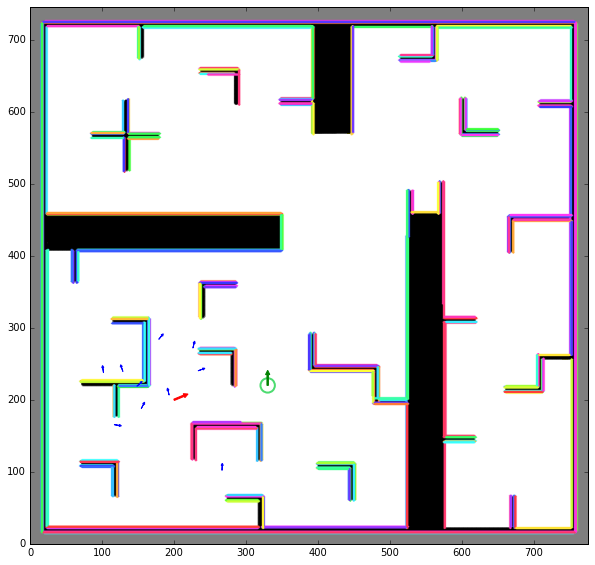

In [25]:
lidar_map = np.copy(np_image)

retorno_lidar_robo = np.copy(lidar_map)


inspercles.nb_draw_map(canvas, particles = particulas, initial_position = initial_pose, pose=pose, robot=True)

In [26]:
retorno_lidar_robo = np.copy(np_image)

#z_real, lidar_map = inspercles.nb_simulate_lidar_fast(pose, angles, np_image, retorno = retorno_lidar_robo, output_image=True)


#inspercles.nb_draw_map(lidar_map, particles = particulas, initial_position = initial_pose, pose=pose, robot=True)

In [27]:
lines

array([[[446, 717, 558, 717]],

       [[ 17, 723, 757, 723]],

       [[ 20,  15, 754,  15]],

       ..., 
       [[230, 159, 230, 116]],

       [[529, 460, 565, 460]],

       [[485, 201, 521, 201]]], dtype=int32)

In [28]:
import rayline

point = (100,80)
direction = (10,11)
p1 = (700,0)
p2 = (700, 1000)

inter = rayline.lineRayIntersectionPoint(point, direction, p1, p2)


In [29]:
inter

[array([ 700.,  740.])]

In [30]:
resultado = inspercles.intersecao_linhas(p1, direction,lines)

In [31]:
x = 100
y = 100
intersecoes = resultado
dists = np.sqrt(np.power(intersecoes[:,0]-x,2), np.power(intersecoes[:,1]-y,2))

In [32]:
dists

array([  9.99900000e+05,   9.99900000e+05,   6.13636364e+02,
         6.15454545e+02,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         6.56000000e+02,   6.58000000e+02,   9.99900000e+05,
         6.51000000e+02,   9.99900000e+05,   6.14545455e+02,
         9.99900000e+05,   6.57000000e+02,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,   9.99900000e+05,   9.99900000e+05,
         9.99900000e+05,

![](anim.gif)

In [33]:
minimo = np.min(dists)
i, = np.where( dists==minimo )

In [34]:
minimo = np.min(dists)

In [35]:
i[0]

2

In [36]:
def intersecao_mais_proxima(ray_origin, ray_direction, lines):
    """
        Dentre as intereseçoes, acha a mais próxima
    """
    intersecoes = inspercles.intersecao_linhas(ray_origin, ray_direction, lines)
    x = ray_origin[0]
    y = ray_origin[1]
    dists = np.sqrt(np.power(intersecoes[:,0]-x,2), np.power(intersecoes[:,1]-y,2))
    minimo = np.min(dists)
    i, = np.where( dists==minimo )
    i = i[0]
    p_int = (intersecoes[i,0] , intersecoes[i, 1])
    return dists[i], p_int

In [37]:
distancia, intersec = intersecao_mais_proxima(point, direction, lines)

In [38]:
intersec

(114.0, 95.400000000000006)

In [39]:
distancia

14.0

In [40]:
canvas_copy = np.copy(canvas)

In [41]:
import numpy
destino_i = (int(intersec[0]), int(intersec[1]))
origem_i = (int(point[0]), int(point[1]))
cv2.line(canvas_copy, origem_i, destino_i , random_color(), 2, cv2.LINE_AA)


array([[[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ..., 
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ..., 
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ..., 
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       ..., 
       [[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ..., 
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ..., 
        [127, 127, 127],
        [127, 127, 127],
        [127, 127, 127]],

       [[127, 127, 127],
        [127, 127, 127],
        [127, 127, 127],
        ..., 
        [127, 127, 127],
        [127, 127, 127],
        [127, 127,

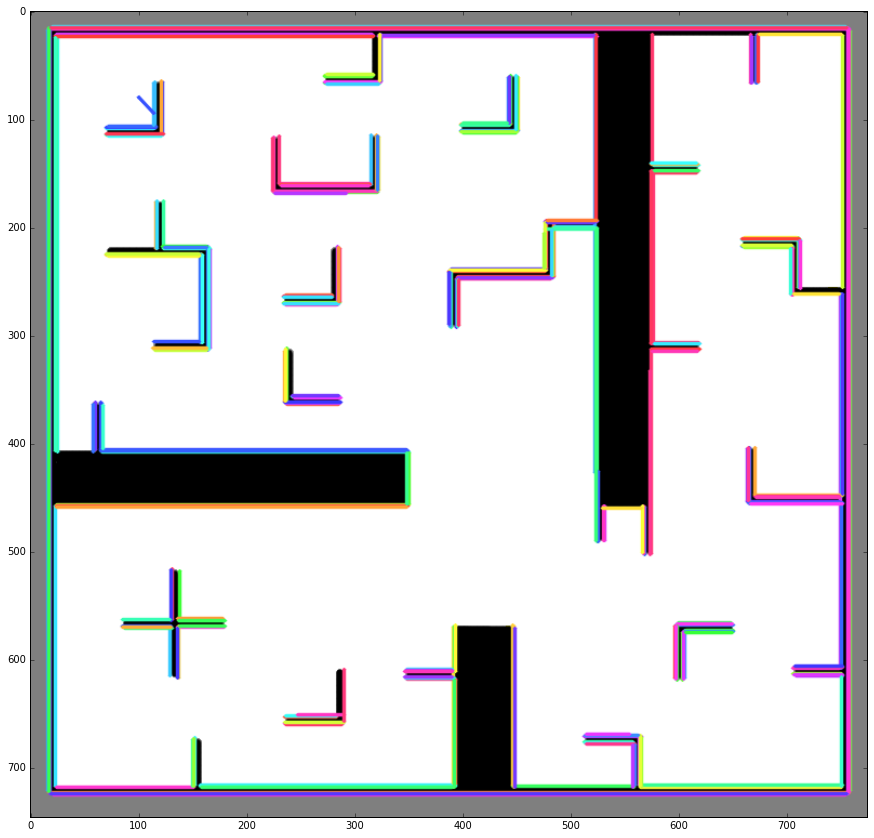

In [42]:
plt.figure(figsize=(15,15))
plt.imshow(canvas_copy)

('Tempo para 500 vezes com imagem: ', 10.268443822860718)
('Tempo para 500 vezes sem imagem: ', 10.444090843200684)


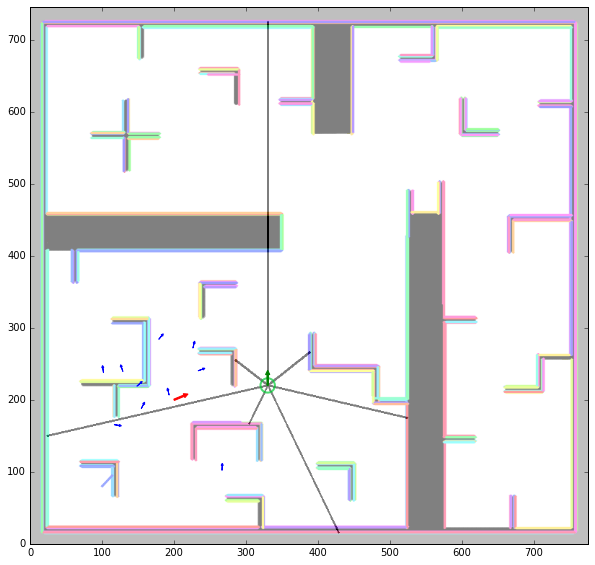

In [47]:
retorno_lidar_robo = np.copy(np_image)

import time
start = time.time()
for i in range(500): 
    z_real, lidar_map = inspercles.nb_simulate_lidar_fast(pose, angles, np_image, retorno = retorno_lidar_robo, output_image=True)
end = time.time()

print("Tempo para 500 vezes com imagem: ", end - start)

start = time.time()
for i in range(500): 
    z_real, dump = inspercles.nb_simulate_lidar_fast(pose, angles, np_image, retorno = retorno_lidar_robo, output_image=False)
end = time.time()

print("Tempo para 500 vezes sem imagem: ", end - start)


ax = inspercles.nb_draw_map(lidar_map, particles = particulas, initial_position = initial_pose, pose=pose, robot=True)
ax.imshow(canvas_copy, alpha=0.5)
